# Sidekick - EM
We train a GP on the successful projects and one on the failed project, predicting the last sample. We compute the distribution using an EM algorithm.

In [1]:
%matplotlib inline
import os
import sys
sys.path.insert(0, os.path.abspath('../utils/')) # Add sibling to Python path
sys.path.insert(0, os.path.abspath('../src/')) # Add sibling to Python path
sys.stdout.flush() # Print output on the fly in Notebook
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,8)
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['legend.fontsize'] = 16
from IPython.display import display
import numpy as np
import GPy
import cPickle as cp
import matplotlib.pyplot as plt
from math import floor
from dataset import Sidekick
from misc_utils import progress

DATA_DIR = "../data/sidekick"

warning in stationary: failed to import cython module: falling back to numpy


## Load data and separate successful from failed projects

In [2]:
sk = Sidekick()
sk.load()
projects_train, projects_test = sk.split()
successful = [project.money for project in projects_train if project.successful]
failed = [project.money for project in projects_train if not project.successful]

Loading projects...
Loading statuses...
Converting to project instances...
Data loaded.


## Train GP-LIN on successful projects
__Note:__ we now consider the output (amount of pledged money at different time) as the input to the GP. The output becomes the final amount of pledged money.

In [4]:
X_train_s = np.ndarray(shape=(len(successful[0]), 1), buffer=np.arange(len(successful[0])), dtype=int) 
Y_train_s = np.array(successful).T
print X_train_s.shape
print Y_train_s.shape

kernel = GPy.kern.Linear(input_dim=1)
m_s = GPy.models.GPRegression(X_train_s, Y_train_s, kernel)
m_s.optimize()
display(m_s)

(1000, 1)
(1000, 6192)


GP_regression.,Value,Constraint,Prior,Tied to
linear.variances,0.000364552591393,+ve,,
Gaussian_noise.variance,7.72270489279,+ve,,


## Visualization
We display the the final state of a project versus its state at time `t`.

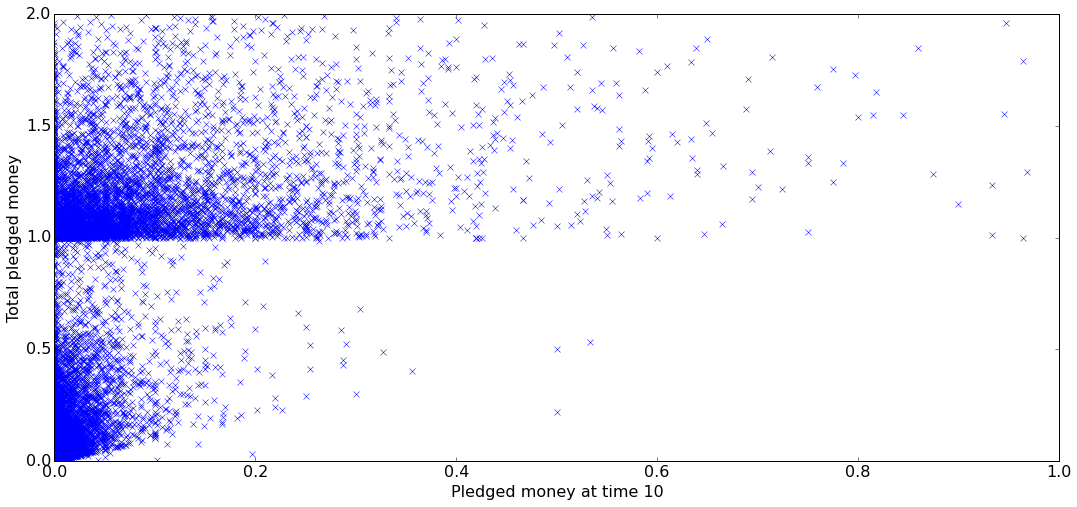

In [25]:
T = -1
t = 10
yt = [p.money[t] for p in sk if p.money[T] < 2 and p.money[t] < 1]
yT = [p.money[T] for p in sk if p.money[T] < 2 and p.money[t] < 1]
plt.plot(yt, yT, 'x')
plt.xlabel('Pledged money at time %s' % t)
plt.ylabel('Total pledged money')
plt.show()